In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.15.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_test,x_train = x_test/255.0, x_train/255.0

In [3]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [4]:
# Compile
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [5]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 723us/step - loss: 0.2967 - accuracy: 0.9131 - val_loss: 0.1402 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.1431 - accuracy: 0.9565 - val_loss: 0.1000 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.1081 - accuracy: 0.9674 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.0878 - accuracy: 0.9725 - val_loss: 0.0775 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.0740 - accuracy: 0.9765 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0713 -

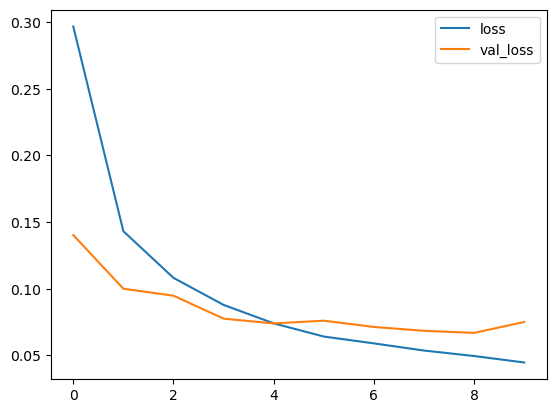

In [6]:
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"],label = "val_loss")
plt.legend()

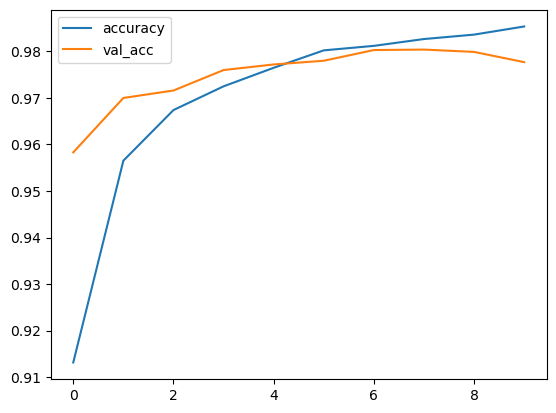

In [7]:
plt.plot(result.history["accuracy"],label="accuracy")
plt.plot(result.history["val_accuracy"],label="val_acc")
plt.legend()

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 354us/step - loss: 0.0750 - accuracy: 0.9777


[0.07501126825809479, 0.9776999950408936]

2


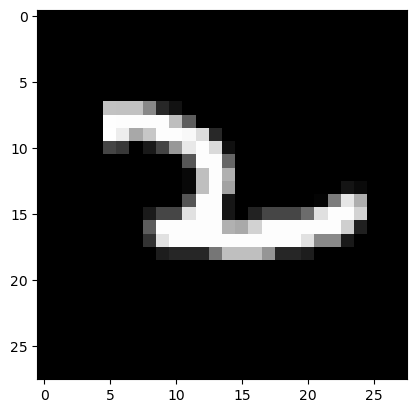

In [9]:
i = np.random.randint(10000)
print(y_test[i])
plt.imshow(x_test[i],cmap = "gray")

313/313 [==============================] - 0s 314us/step
Confusion matrix, without normalization
[[ 972    0    0    1    0    1    3    1    2    0]
 [   0 1122    3    2    0    0    2    0    6    0]
 [   4    1 1012    4    1    0    2    3    5    0]
 [   0    0    4  996    0    2    0    3    5    0]
 [   2    0    3    1  951    1    8    1    2   13]
 [   3    1    0   17    1  857    5    0    6    2]
 [   5    2    1    1    3    6  938    0    2    0]
 [   1    5   10    3    0    0    0 1000    2    7]
 [   6    0    3    8    4    2    0    3  945    3]
 [   1    2    0    4    7    2    1    5    3  984]]


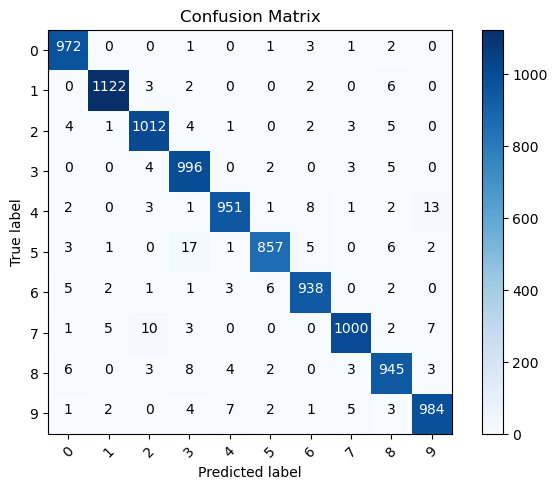

In [10]:
# Now let's look at what is guessed wrong by the model
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 6 Predicted: 4')

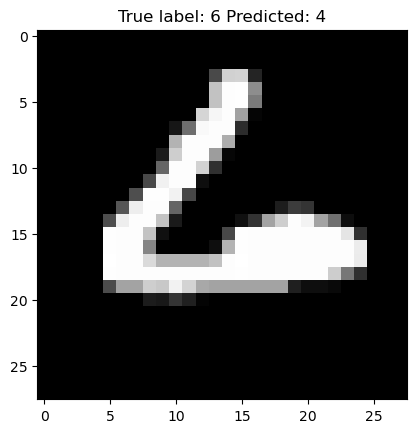

In [37]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i]))

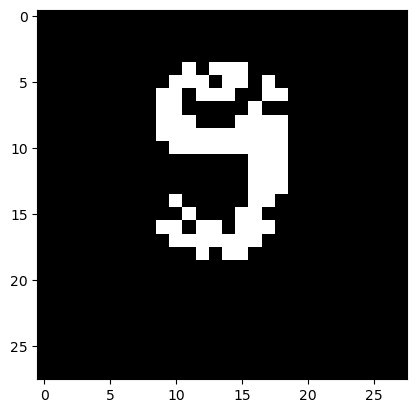

In [75]:
img = plt.imread("nine3.jpeg")
small_image = img[::32, ::28]
small_image = small_image[:28, :, 0]
image_max = small_image.max()
small_image = small_image/image_max
image_max = small_image.max()
image_min = small_image.min()
image_middle = (image_max + image_min)/2
small_image = small_image - image_middle
small_image = small_image*(-1)
small_image = small_image + image_middle

for i in range(28):
    for j in range(28):
        if small_image[i,j] > 0.35:
            small_image[i,j] = 1
        else:
            small_image[i,j] = 0

plt.imshow(small_image,cmap="gray")

1/1 [==============================] - 0s 10ms/step
9


Text(0.5, 1.0, ' Predicted: 9')

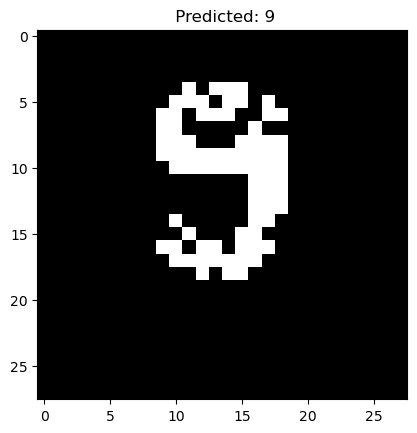

In [77]:
x = model.predict(small_image.reshape(1,28,28))
print(x.argmax())
plt.imshow(small_image,cmap="gray")
plt.title(" Predicted: %s" % (x.argmax()))